This code is written by Sijing Zhong in 2023.12.3 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

In [26]:
#Mean Absolute Percentage Error
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
# adjusted R square
def adj_r_squared(x_test,y_test,y_predict):
    SS_R = sum((y_test-y_predict)**2)
    SS_T = sum((y_test-np.mean(y_test))**2)
    r_squared = 1 - (float(SS_R))/SS_T
    adj_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
    return adj_r_squared
def show_error_plot(y_test,y_pred):
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)
    ax.set_xlabel("Measured")
    ax.set_ylabel("Predicted")
    plt.show()

Data importing and prepcessing

In [27]:
test_data=pd.read_excel('TestSet.xlsx')

In [28]:
test_data

,ID,Apha,Theta/Beta,Valence,Unnamed: 4
0,Muse_R01,0.675610,-0.668612,0.447,0.4
1,Muse_J01,-0.092876,0.751179,0.447,0.8
2,Muse_S01,-0.108179,0.942173,0.447,0.7


In [29]:
x_test = test_data[['Apha','Theta/Beta']]

y_test = test_data['Valence']

In [30]:
data=pd.read_csv('final.csv')

In [7]:
data

,Unnamed: 0,Sample,alpha_ratio,theta_beta_ratio,valence
0,2,sub-001_ses-01,-0.00050,-0.007053,0.4470
1,3,sub-001_ses-02,-0.01160,0.007117,0.2720
2,4,sub-001_ses-03,0.00825,0.006644,0.6120
3,5,sub-001_ses-04,0.00130,0.018149,0.0734
4,6,sub-001_ses-05,0.00500,-0.011384,0.3250
...,...,...,...,...,...
235,237,sub-020_ses-08,-0.00025,-0.015165,0.5040
236,238,sub-020_ses-09,0.00915,-0.005874,0.7410
237,239,sub-020_ses-10_,0.01120,-0.020939,0.3460
238,240,sub-020_ses-11_,-0.00330,-0.013304,0.6960


In [31]:
data=pd.read_csv('final.csv')
x=data[['alpha_ratio','theta_beta_ratio']]
y=data['valence']
# mean_cols=x.mean()
# x=x.fillna(mean_cols)  # fill it in mean value
# x_dum=pd.get_dummies(x)    #one hot coding
print(x.shape)
print(y.shape)

(240, 2)
(240,)


In [32]:
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size = 0.2,random_state = 1)
print(x_train.shape)
print(x_val.shape)
print(y_val.shape)
#normalised data
# x_dum=pd.get_dummies(x)
ss=StandardScaler()
x_train1=ss.fit_transform(x_train)
x_val1=ss.transform(x_val)
y_val1 = y_val
y_train1 = y_train

(192, 2)
(48, 2)
(48,)


Unnormalised data for training and testing

In [33]:
models=[LinearRegression(),KNeighborsRegressor(),SVR(),Ridge(),Lasso(),MLPRegressor(),DecisionTreeRegressor(),ExtraTreeRegressor(),XGBRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor()]
models_str=['LinearRegression','KNNRegressor','SVR','Ridge','Lasso','MLPRegressor','DecisionTree','ExtraTree','XGBoost','RandomForest','AdaBoost','GradientBoost','Bagging']

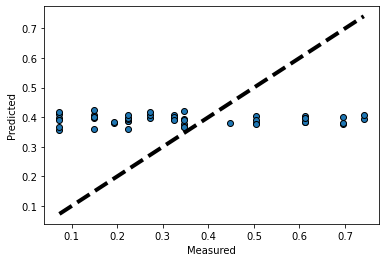

LinearRegression score：-0.07174104523567748 mape：47.34792274087452


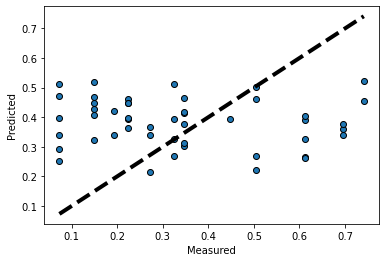

KNNRegressor score：-0.283161565106256 mape：53.50262996174725


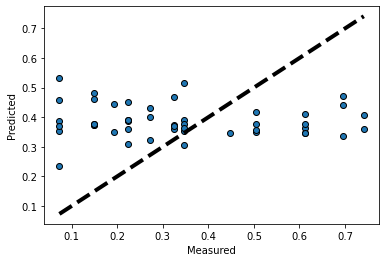

SVR score：-0.16100351005869729 mape：48.43362196774588


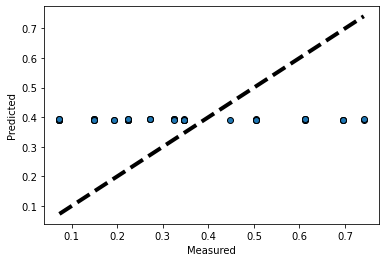

Ridge score：-0.06462188118937529 mape：47.2639861697909


D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


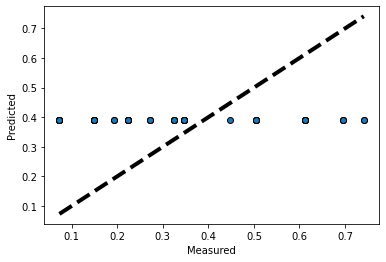

Lasso score：-0.06462848958471468 mape：47.25635669189068


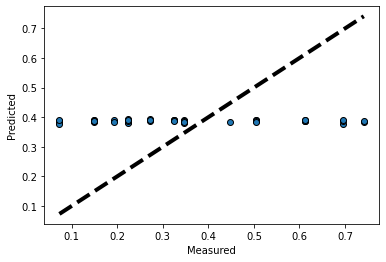

MLPRegressor score：-0.053848371453241395 mape：47.488576907185156


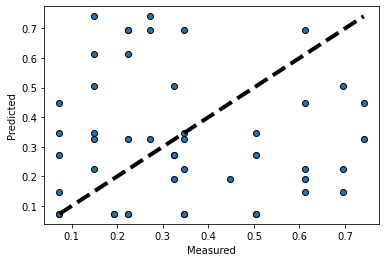

DecisionTree score：-1.2060016133379667 mape：119.91674251912634


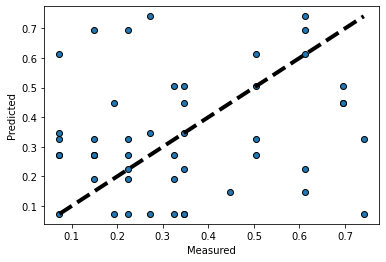

ExtraTree score：-0.5977136284818256 mape：103.5435985708962


D:\Anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


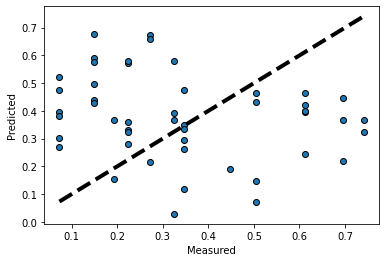

XGBoost score：-0.9510944722403885 mape：97.63406110874013


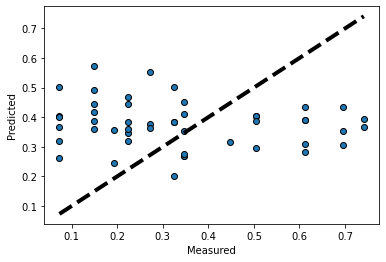

RandomForest score：-0.2910863528034864 mape：53.63360317040603


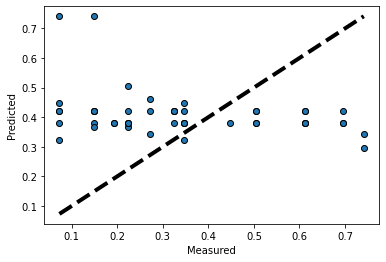

AdaBoost score：-0.5033926729164748 mape：50.04455580119151


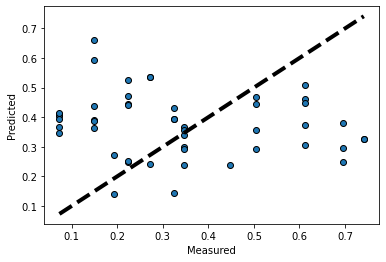

GradientBoost score：-0.4689824440824879 mape：56.17152965106011


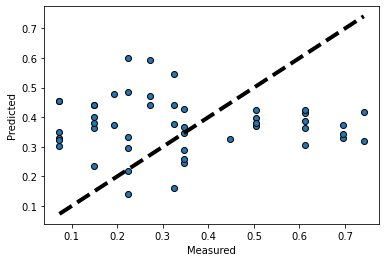

Bagging score：-0.27419131294857 mape：53.952065509857164


In [34]:
error_all_un=[]
score_all_un=[]
score2_all_un=[]
mape_all_un,pearsoncc_all_un=[],[]

for name,model in zip(models_str,models):
    #print('run model：'+name)
    model=model   
    model.fit(x_train,y_train)
    y_pred=model.predict(x_val) 
    score=model.score(x_val,y_val)
    score2=adj_r_squared(x_val, np.ravel(y_val),np.ravel(y_pred))
    #score_mixed_morgan.append(str(score)[:5])
    score2_all_un.append(score2)
    score_all_un.append(score)
    error_all_un.append(np.mean(np.abs(np.ravel(y_pred)-np.ravel(y_val))))
    mape_all_un.append(mape(np.ravel(y_pred),np.ravel(y_val)))
    pearsoncc_all_un.append(pearsonr(np.ravel(y_pred),np.ravel(y_val))[0])
    
    show_error_plot(y_val, y_pred)
    print(name +' score：'+str(score)+' mape：'+str(mape(np.ravel(y_pred),np.ravel(y_val))))

In [35]:
models_str=['Linear Regression','KNNRegressor','SVR','Ridge','Lasso','MLPRegressor','DecisionTree','ExtraTree','XGBoost','RandomForest','AdaBoost','GradientBoost','Bagging']
#results=pd.DataFrame(models_str)
results=pd.DataFrame(error_all_un,index=models_str)
#results['MAE']=val_mae_models
results['MAPE']=mape_all_un
results['R2']=score_all_un
results['Adjusted']=score2_all_un
results['Pearson Coeficient']=pearsoncc_all_un
results.rename(columns={0:'MAE'},inplace=True)
results
#results=pd.DataFrame(val_r2_models,index=models_str)
#results['Model name']=pd.DataFrame(models_str)
#results['scores']=val_r2_list

,MAE,MAPE,R2,Adjusted,Pearson Coeficient
Linear Regression,0.185906,47.347923,-0.071741,-0.119374,-0.010254
KNNRegressor,0.198179,53.502630,-0.283162,-0.340191,-0.103614
SVR,0.189583,48.433622,-0.161004,-0.212604,-0.064032
Ridge,0.185335,47.263986,-0.064622,-0.111938,-0.027927
Lasso,0.185330,47.256357,-0.064628,-0.111945,NaN
MLPRegressor,0.183553,47.488577,-0.053848,-0.100686,-0.044061
DecisionTree,0.252046,119.916743,-1.206002,-1.304046,-0.049335
ExtraTree,0.202296,103.543599,-0.597714,-0.668723,0.177782
XGBoost,0.243602,97.634061,-0.951094,-1.037810,-0.241151
RandomForest,0.202316,53.633603,-0.291086,-0.348468,-0.153524


Normalised data for training

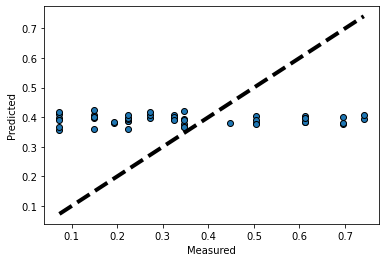

Linear Regression score：-0.07174104523567748 mape：47.34792274087452


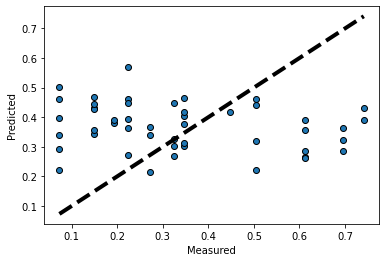

KNNRegressor score：-0.33534394042977733 mape：55.53393472334418


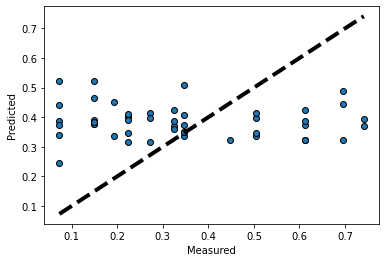

SVR score：-0.16646150896761047 mape：48.59189916021309


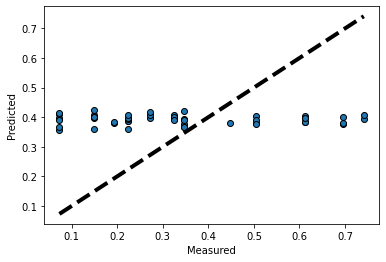

Ridge score：-0.07165876092351287 mape：47.34763769525044


D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


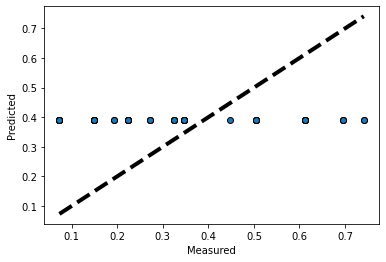

Lasso score：-0.06462848958471468 mape：47.25635669189068


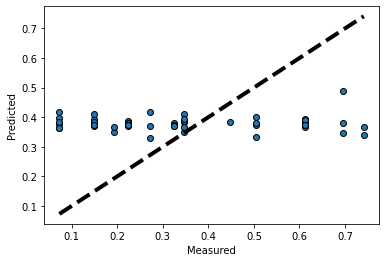

MLPRegressor score：-0.05087295178633422 mape：47.624564850189515


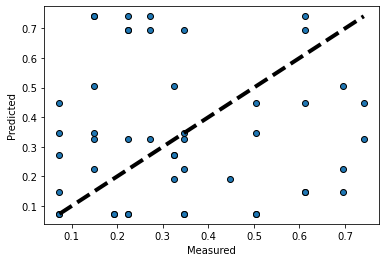

DecisionTree score：-1.2602641804497137 mape：117.33137421315278


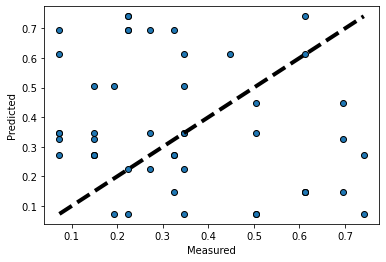

ExtraTree score：-1.5728069468885733 mape：128.11840354132303


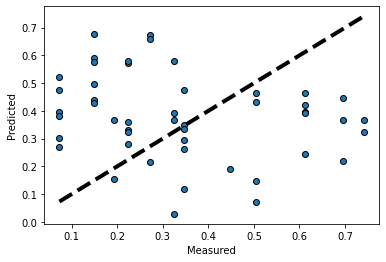

XGBoost score：-0.9525118820947329 mape：97.68674349605291


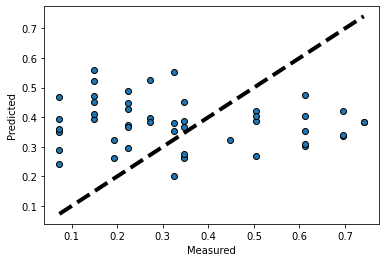

RandomForest score：-0.2940294842713993 mape：53.59863659364935


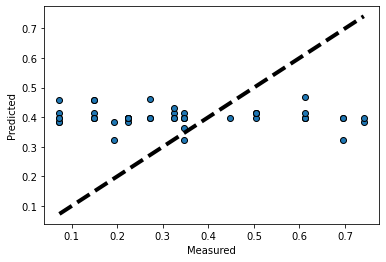

AdaBoost score：-0.13774830300737695 mape：47.285745790120664


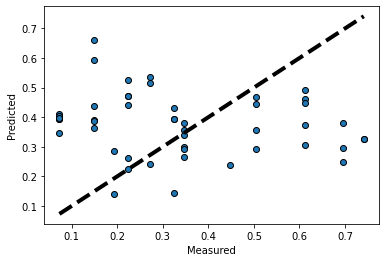

GradientBoost score：-0.4734725840949918 mape：55.96825830164852


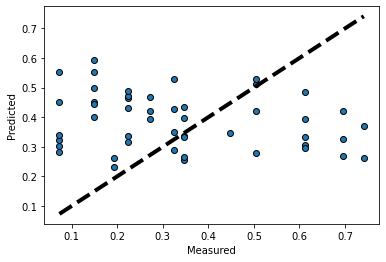

Bagging score：-0.47190566845866955 mape：54.687704437168804


In [37]:
error_all_normalised=[]
score_all_normalised=[]
score2_all_normalised=[]
mape_all_normalised,pearsoncc_all_normalised=[],[]
    
for name,model in zip(models_str,models):

    model=model   
    model.fit(x_train1,y_train1)
    y_pred1=model.predict(x_val1) 
    score=model.score(x_val1,y_val1)
    score2=adj_r_squared(x_val1, np.ravel(y_val1),np.ravel(y_pred1))
    score2_all_normalised.append(score2)
    score_all_normalised.append(score)
    error_all_normalised.append(np.mean(np.abs(np.ravel(y_pred1)-np.ravel(y_val1))))
    mape_all_normalised.append(mape(np.ravel(y_pred1),np.ravel(y_val1)))
    pearsoncc_all_normalised.append(pearsonr(np.ravel(y_pred1),np.ravel(y_val1))[0])
    show_error_plot(y_val1, y_pred1)


#     print(y_pred1)
#     print(y_test1)
    print(name +' score：'+str(score)+' mape：'+str(mape(np.ravel(y_pred1),np.ravel(y_val1))))

In [38]:
models_str=['Linear Regression','KNNRegressor','SVR','Ridge','Lasso','MLPRegressor','DecisionTree','ExtraTree','XGBoost','RandomForest','AdaBoost','GradientBoost','Bagging']
#results=pd.DataFrame(models_str)
results=pd.DataFrame(error_all_normalised,index=models_str)
#results['MAE']=val_mae_models
results['MAPE']=mape_all_normalised
# results['R2']=score_all_normalised
# results['Adjusted R2']=score2_all_normalised
results['Pearson Coeficient']=pearsoncc_all_normalised
results.rename(columns={0:'MAE'},inplace=True)
results
#results=pd.DataFrame(val_r2_models,index=models_str)
#results['Model name']=pd.DataFrame(models_str)
#results['scores']=val_r2_list

,MAE,MAPE,Pearson Coeficient
Linear Regression,0.185906,47.347923,-0.010254
KNNRegressor,0.199042,55.533935,-0.212262
SVR,0.188893,48.591899,-0.073254
Ridge,0.185902,47.347638,-0.010256
Lasso,0.185330,47.256357,NaN
MLPRegressor,0.180048,47.624565,0.000913
DecisionTree,0.249296,117.331374,0.006745
ExtraTree,0.268608,128.118404,-0.220392
XGBoost,0.243738,97.686743,-0.242372
RandomForest,0.203048,53.598637,-0.119412


D:\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
<ipython-input-2-bb4f71f45500>:8: RuntimeWarning: divide by zero encountered in double_scalars
  r_squared = 1 - (float(SS_R))/SS_T
D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


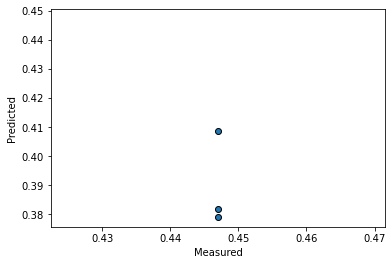

Linear Regression score：0.0 mape：14.814252003045183


D:\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
<ipython-input-2-bb4f71f45500>:8: RuntimeWarning: divide by zero encountered in double_scalars
  r_squared = 1 - (float(SS_R))/SS_T
D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


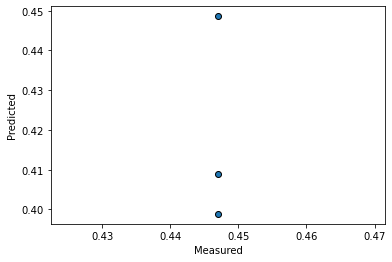

D:\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
<ipython-input-2-bb4f71f45500>:8: RuntimeWarning: divide by zero encountered in double_scalars
  r_squared = 1 - (float(SS_R))/SS_T
D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


KNNRegressor score：0.0 mape：7.254955487057638


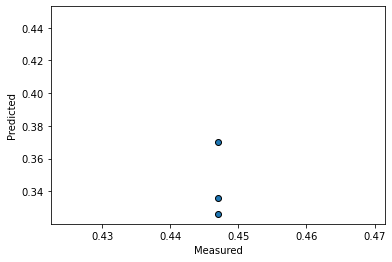

D:\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
<ipython-input-2-bb4f71f45500>:8: RuntimeWarning: divide by zero encountered in double_scalars
  r_squared = 1 - (float(SS_R))/SS_T
D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


SVR score：0.0 mape：30.33242100885058


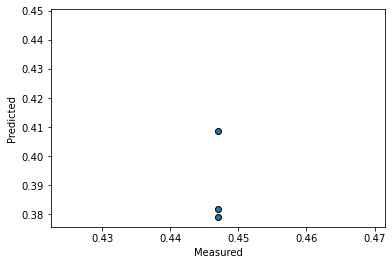

D:\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
<ipython-input-2-bb4f71f45500>:8: RuntimeWarning: divide by zero encountered in double_scalars
  r_squared = 1 - (float(SS_R))/SS_T
D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Ridge score：0.0 mape：14.808321189204236


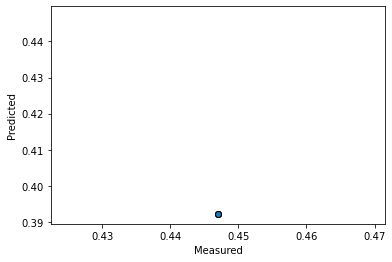

D:\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
<ipython-input-2-bb4f71f45500>:8: RuntimeWarning: divide by zero encountered in double_scalars
  r_squared = 1 - (float(SS_R))/SS_T
D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Lasso score：0.0 mape：13.97821473440411


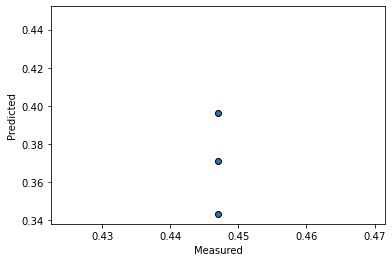

MLPRegressor score：0.0 mape：21.176258752258146


D:\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
<ipython-input-2-bb4f71f45500>:8: RuntimeWarning: divide by zero encountered in double_scalars
  r_squared = 1 - (float(SS_R))/SS_T
D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


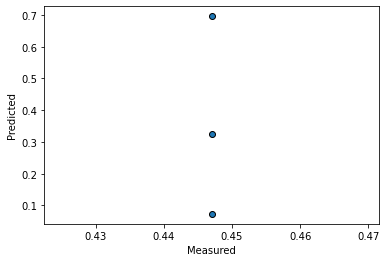

D:\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but ExtraTreeRegressor was fitted without feature names
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but ExtraTreeRegressor was fitted without feature names
  warnings.warn(
<ipython-input-2-bb4f71f45500>:8: RuntimeWarning: divide by zero encountered in double_scalars
  r_squared = 1 - (float(SS_R))/SS_T
D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


DecisionTree score：0.0 mape：194.10204974016867


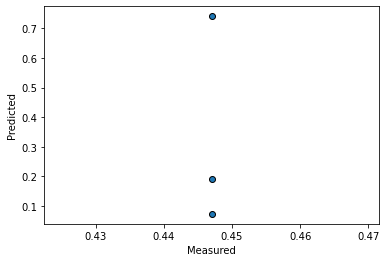

ExtraTree score：0.0 mape：226.75805219666105


<ipython-input-2-bb4f71f45500>:8: RuntimeWarning: divide by zero encountered in double_scalars
  r_squared = 1 - (float(SS_R))/SS_T
D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


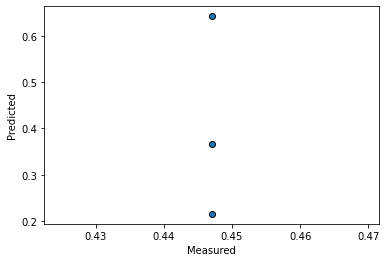

XGBoost score：0.0 mape：53.44217852017966


D:\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
<ipython-input-2-bb4f71f45500>:8: RuntimeWarning: divide by zero encountered in double_scalars
  r_squared = 1 - (float(SS_R))/SS_T
D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


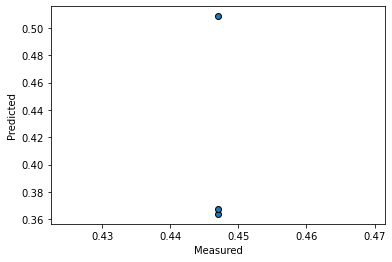

RandomForest score：0.0 mape：18.818744458929647


D:\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  warnings.warn(
<ipython-input-2-bb4f71f45500>:8: RuntimeWarning: divide by zero encountered in double_scalars
  r_squared = 1 - (float(SS_R))/SS_T
D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


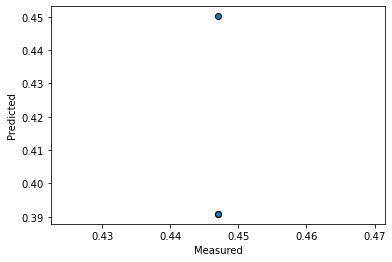

AdaBoost score：0.0 mape：9.814059711545726


D:\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
<ipython-input-2-bb4f71f45500>:8: RuntimeWarning: divide by zero encountered in double_scalars
  r_squared = 1 - (float(SS_R))/SS_T
D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


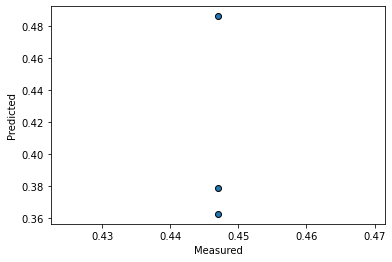

GradientBoost score：0.0 mape：16.44631586847039


D:\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
<ipython-input-2-bb4f71f45500>:8: RuntimeWarning: divide by zero encountered in double_scalars
  r_squared = 1 - (float(SS_R))/SS_T
D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


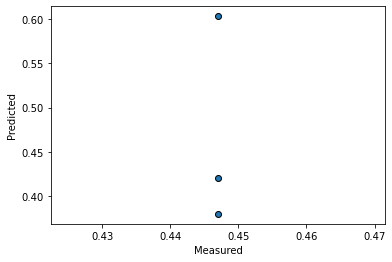

Bagging score：0.0 mape：16.730564314402272


In [23]:
error_all_normalised=[]
score_all_normalised=[]
score2_all_normalised=[]
mape_all_normalised,pearsoncc_all_normalised=[],[]
    
for name,model in zip(models_str,models):

    model=model   
    model.fit(x_train1,y_train1)
    y_pred1=model.predict(x_test) 
    score=model.score(x_test,y_test)
    score2=adj_r_squared(x_val1, np.ravel(y_test),np.ravel(y_pred1))
    score2_all_normalised.append(score2)
    score_all_normalised.append(score)
    error_all_normalised.append(np.mean(np.abs(np.ravel(y_pred1)-np.ravel(y_test))))
    mape_all_normalised.append(mape(np.ravel(y_pred1),np.ravel(y_test)))
    pearsoncc_all_normalised.append(pearsonr(np.ravel(y_pred1),np.ravel(y_test))[0])
    show_error_plot(y_test, y_pred1)


#     print(y_pred1)
#     print(y_test1)
    print(name +' score：'+str(score)+' mape：'+str(mape(np.ravel(y_pred1),np.ravel(y_test))))

In [24]:
models_str=['Linear Regression','KNNRegressor','SVR','Ridge','Lasso','MLPRegressor','DecisionTree','ExtraTree','XGBoost','RandomForest','AdaBoost','GradientBoost','Bagging']
#results=pd.DataFrame(models_str)
results=pd.DataFrame(error_all_normalised,index=models_str)
#results['MAE']=val_mae_models
results['MAPE']=mape_all_normalised
# results['R2']=score_all_normalised
# results['Adjusted R2']=score2_all_normalised
results['Pearson Coeficient']=pearsoncc_all_normalised
results.rename(columns={0:'MAE'},inplace=True)
results
#results=pd.DataFrame(val_r2_models,index=models_str)
#results['Model name']=pd.DataFrame(models_str)
#results['scores']=val_r2_list

,MAE,MAPE,Pearson Coeficient
Linear Regression,0.057225,14.814252,NaN
KNNRegressor,0.029307,7.254955,NaN
SVR,0.103038,30.332421,NaN
Ridge,0.057210,14.808321,NaN
Lasso,0.054820,13.978215,NaN
MLPRegressor,0.076854,21.176259,NaN
DecisionTree,0.248200,194.102050,NaN
ExtraTree,0.307200,226.758052,NaN
XGBoost,0.169516,53.442179,NaN
RandomForest,0.074585,18.818744,NaN
